# OpenPIV tutorial

Here we analyse less optimal images 

In [1]:
from openpiv import tools, process, scaling, validation, filters, pyprocess
import numpy as np
import pylab

%matplotlib inline

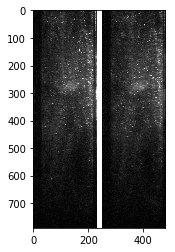

In [2]:
frame_a  = tools.imread( 'test001.png' )
frame_b  = tools.imread( 'test002.png' )
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b],cmap=pylab.cm.gray)

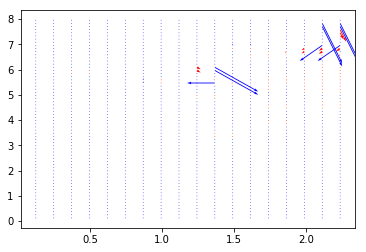

CPU times: user 364 ms, sys: 10.9 ms, total: 375 ms
Wall time: 383 ms


In [3]:
%%time
u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                           window_size=24, overlap=12, dt=0.02, 
                                                           search_area_size=64, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_extended.txt' )
tools.display_vector_field('exp1_001_extended.txt', scale=100, width=0.0025)

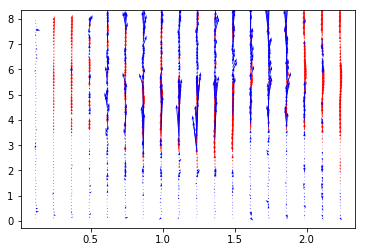

CPU times: user 958 ms, sys: 17.4 ms, total: 976 ms
Wall time: 987 ms


In [4]:
%%time
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, corr_method='fft', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_fft.txt' )
tools.display_vector_field('exp1_001_fft.txt', scale=10, width=0.0025)

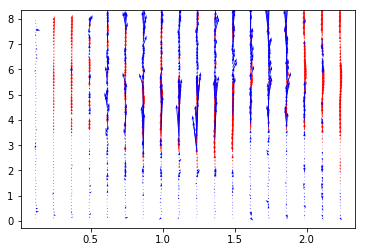

CPU times: user 3.09 s, sys: 16.4 ms, total: 3.1 s
Wall time: 3.13 s


In [5]:
%%time
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, corr_method='direct', window_size=24, overlap=12, dt=0.02, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, window_size=24, overlap=12 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 2.5 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2.5)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )
tools.save(x, y, u, v, mask, 'exp1_001_direct.txt' )
tools.display_vector_field('exp1_001_direct.txt', scale=10, width=0.0025)

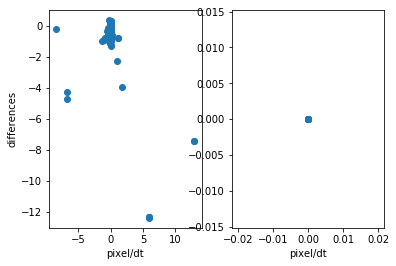

In [6]:
a = np.loadtxt('exp1_001_extended.txt')
b = np.loadtxt('exp1_001_fft.txt')
c = np.loadtxt('exp1_001_direct.txt')

fig,ax = pylab.subplots(1,2)
ax[0].scatter(a[:,2]-b[:,2],a[:,3]-b[:,3])
ax[1].scatter(b[:,2]-c[:,2],b[:,3]-c[:,3])
#ax[1].set_aspect(1)
#ax[1].set_xticks([-.2,.2])
#ax[1].set_yticks([-.2,.2])
ax[0].set_xlabel('pixel/dt')
ax[1].set_xlabel('pixel/dt')
ax[0].set_ylabel('differences');
